In [5]:
from openai import OpenAI
import os
from dotenv import load_dotenv
import base64
import mimetypes
from IPython.display import display, Image
load_dotenv()

True

In [6]:
client = OpenAI(
    api_key=os.getenv('OPENAI_API_KEY'))


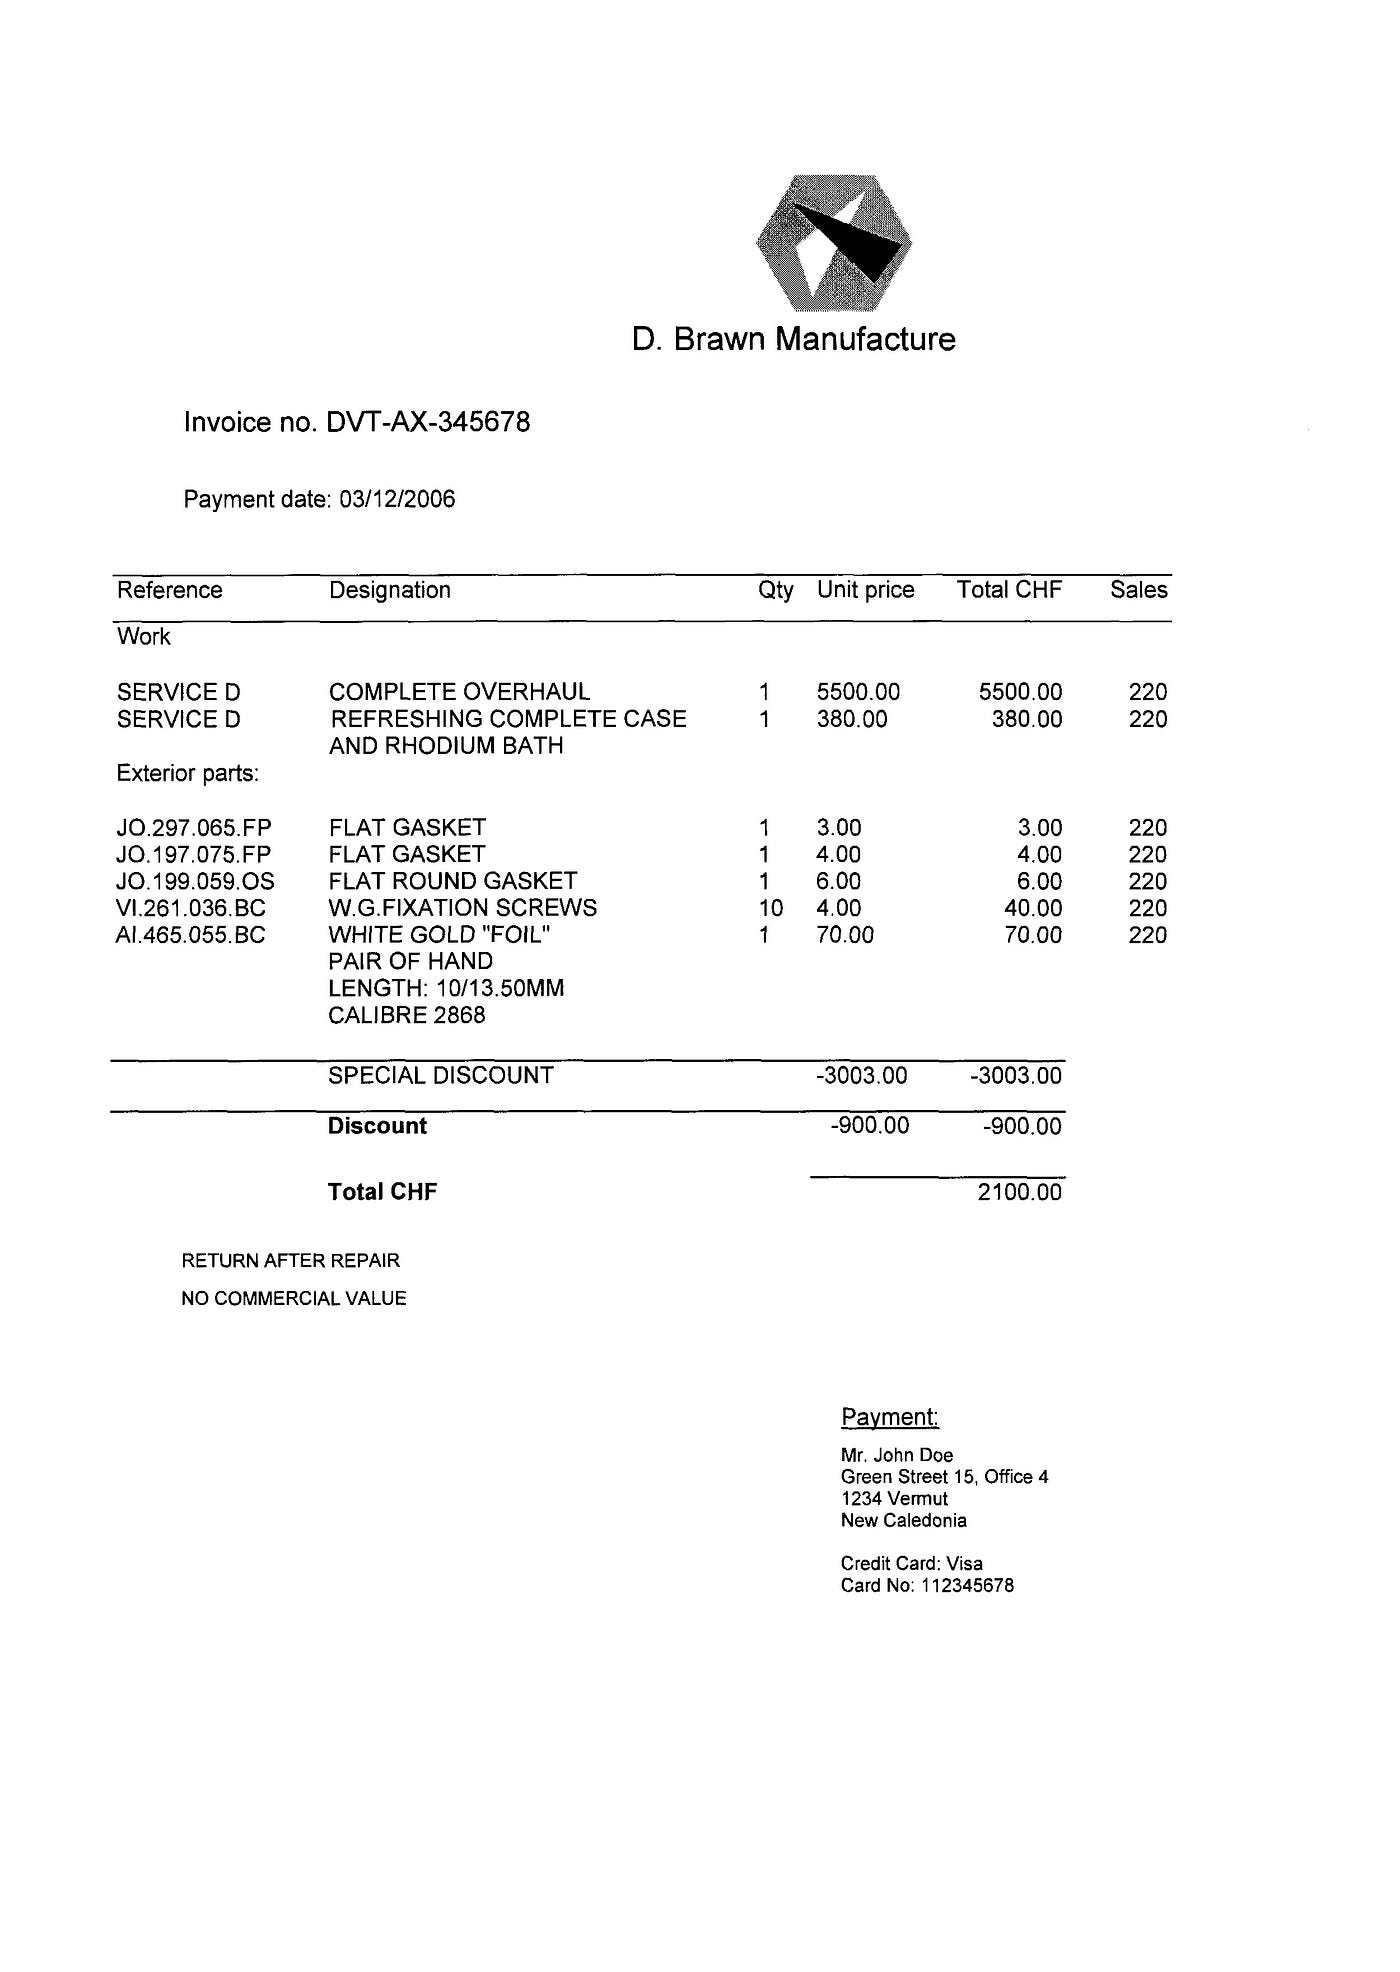

In [7]:
def image_to_base64(image_path):
    # Guess the MIME type of the image
    mime_type, _ = mimetypes.guess_type(image_path)
    
    if not mime_type or not mime_type.startswith('image'):
        raise ValueError("The file type is not recognized as an image")
    
    # Read the image binary data
    with open(image_path, 'rb') as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    
    # Format the result with the appropriate prefix
    image_base64 = f"data:{mime_type};base64,{encoded_string}"

    # Display the image
    display(Image(url=image_base64))
    
    return image_base64

base64_string = image_to_base64("images/invoice1.jpeg")

In [8]:
def chat(query, image_path):
    # Guess the MIME type of the image
    mime_type, _ = mimetypes.guess_type(image_path)
    
    if not mime_type or not mime_type.startswith('image'):
        raise ValueError("The file type is not recognized as an image")
    
    # Read the image binary data
    with open(image_path, 'rb') as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    
    # Format the result with the appropriate prefix
    image_base64 = f"data:{mime_type};base64,{encoded_string}"

    # Display the image
    display(Image(url=image_base64))

    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": query},
                    {
                        "type": "image_url",
                        "image_url": base64_string,
                    },
                ],
            }
        ],
        max_tokens=300,
    )

    return response.choices[0].message.content

In [9]:
query = 'What is the date of the payment?'


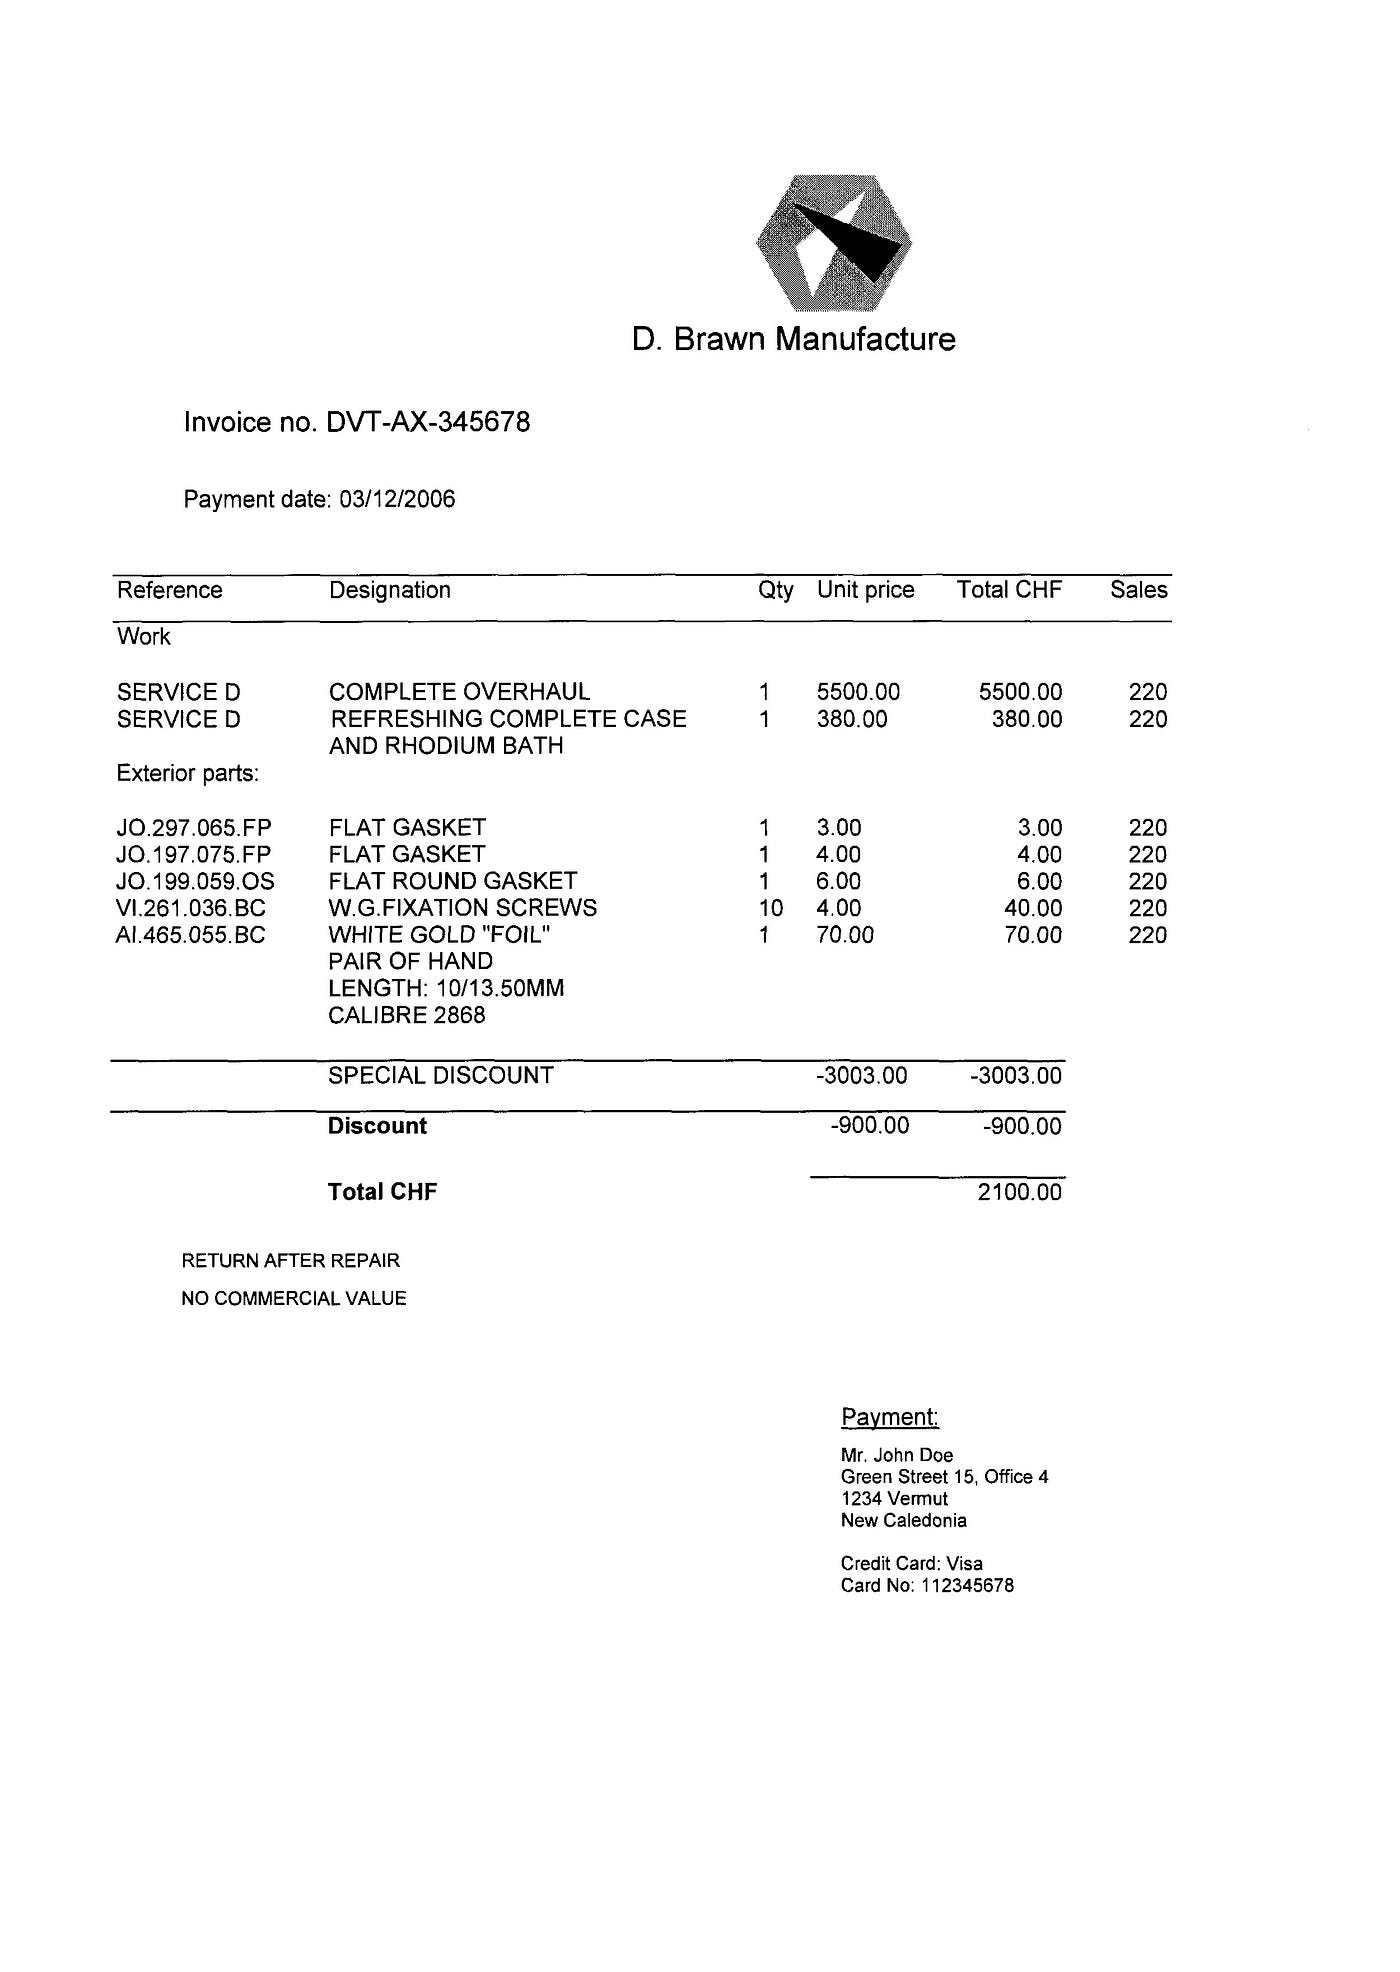

'The payment date on the invoice is 03/12/2006.'

In [10]:
chat(query , 'images/invoice1.jpeg')